#### 데이터 불러오기

In [96]:
# 와인 데이터 사용
# - 08_wine.csv
import pandas as pd

wine = pd.read_csv('./data/08_wine.csv')
wine.info()

# pH : 수소이온농도는 물질의 산성과 알칼리성 정도
# alcohol sugar  pH   class
# 도수     당도 농도 와인종류

# 범주 : 와인종류(0=레드와인, 1=화이트와인)
# 범주가 2개인 이진분류이므로
# 범주의 값이 1인 화이트와인을 찾는 것이 목적

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [97]:
wine.corr()

,alcohol,sugar,pH,class
alcohol,1.000000,-0.359415,0.121248,0.032970
sugar,-0.359415,1.000000,-0.267320,0.348821
pH,0.121248,-0.267320,1.000000,-0.329129
class,0.032970,0.348821,-0.329129,1.000000


#### 데이터 전처리

In [98]:
import numpy as np

wine_input = wine[['alcohol','sugar','pH']]
wine_input = wine_input.to_numpy()
print(wine_input.shape)

wine_target = wine['class']
wine_target = np.array(wine_target)
wine_target.shape

(6497, 3)


(6497,)

In [99]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(wine_input,
                                                                      wine_target,
                                                                      test_size=0.25,
                                                                      random_state=42)

print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(4872, 3)
(4872,)
(1625, 3)
(1625,)


In [100]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input, train_target)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(ss.mean_, ss.scale_)

[10.49046798  5.45803571  3.21665846] [1.19475276 4.78329406 0.15985536]


#### 로지스틱회귀 분류

In [101]:
# 훈련/테스트 데이터 검증, 계수 및 y절편까지 출력
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(train_scaled, train_target)

print('훈련',lr.score(train_scaled, train_target))
print('테스트',lr.score(test_scaled, test_target))
print()
print('계수',lr.coef_, 'y절편',lr.intercept_)

훈련 0.7859195402298851
테스트 0.7655384615384615

계수 [[ 0.53273869  1.67940585 -0.7090217 ]] y절편 [1.84713933]


In [102]:
predict_data = wine[['alcohol','sugar','pH']]
predict_data

,alcohol,sugar,pH
0,9.4,1.9,3.51
1,9.8,2.6,3.20
2,9.8,2.3,3.26
3,9.8,1.9,3.16
4,9.4,1.9,3.51
...,...,...,...
6492,11.2,1.6,3.27
6493,9.6,8.0,3.15
6494,9.4,1.2,2.99
6495,12.8,1.1,3.34


In [103]:
predict_data = predict_data.to_numpy()
predict_data

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [104]:
result_predict = lr.predict(predict_data)
result_predict

wine_pred = wine[['alcohol','sugar','pH']]
wine_pred['class'] = wine['class']
wine_pred['class_pred'] = result_predict
wine_pred

,alcohol,sugar,pH,class,class_pred
0,9.4,1.9,3.51,0.0,1.0
1,9.8,2.6,3.20,0.0,1.0
2,9.8,2.3,3.26,0.0,1.0
3,9.8,1.9,3.16,0.0,1.0
4,9.4,1.9,3.51,0.0,1.0
...,...,...,...,...,...
6492,11.2,1.6,3.27,1.0,1.0
6493,9.6,8.0,3.15,1.0,1.0
6494,9.4,1.2,2.99,1.0,1.0
6495,12.8,1.1,3.34,1.0,1.0


In [105]:
o_cnt = len(wine_pred[wine_pred['class'] == wine_pred['class_pred']])

x_cnt = len(wine_pred[wine_pred['class'] != wine_pred['class_pred']])

sum_cnt = len(wine_pred)

o = round(o_cnt/sum_cnt,2)
x = round(x_cnt/sum_cnt,2)

print('총 100% 중 정답률 {}%, 오답률{}%'.format(o,x))

총 100% 중 정답률 0.75%, 오답률0.25%


#### 결정트리(Decision Tree)
- 사용하는 패키지 : sklearn.tree
- 사용하는 클래스 : DecisionTreeClassifier
- 
- 질문(조건)을 통해서 트리(True와False) 2개씩으로 가지를 치면서 분류를 함
- 질문을 스스로 찾아서, 계속해서 질문(조건)을 만들어 나가면서 분류(트리)함
- 더이상 질문이 없으면 결정(Decision)하게 된다
- 분류 정확도가 높다
- 질문(조건)을 통해 분류해 나가는 절차를 시각화 가능함(장점)
- 시각화 함수 : 사이킷런 패키지의 plot_tree(모델변수)

In [107]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

# 해석
# 과대적합이 심함 (훈련 > 테스트)

0.9973316912972086
0.8523076923076923


In [108]:
# 트리 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(dt)
plt.show()

KeyboardInterrupt: 

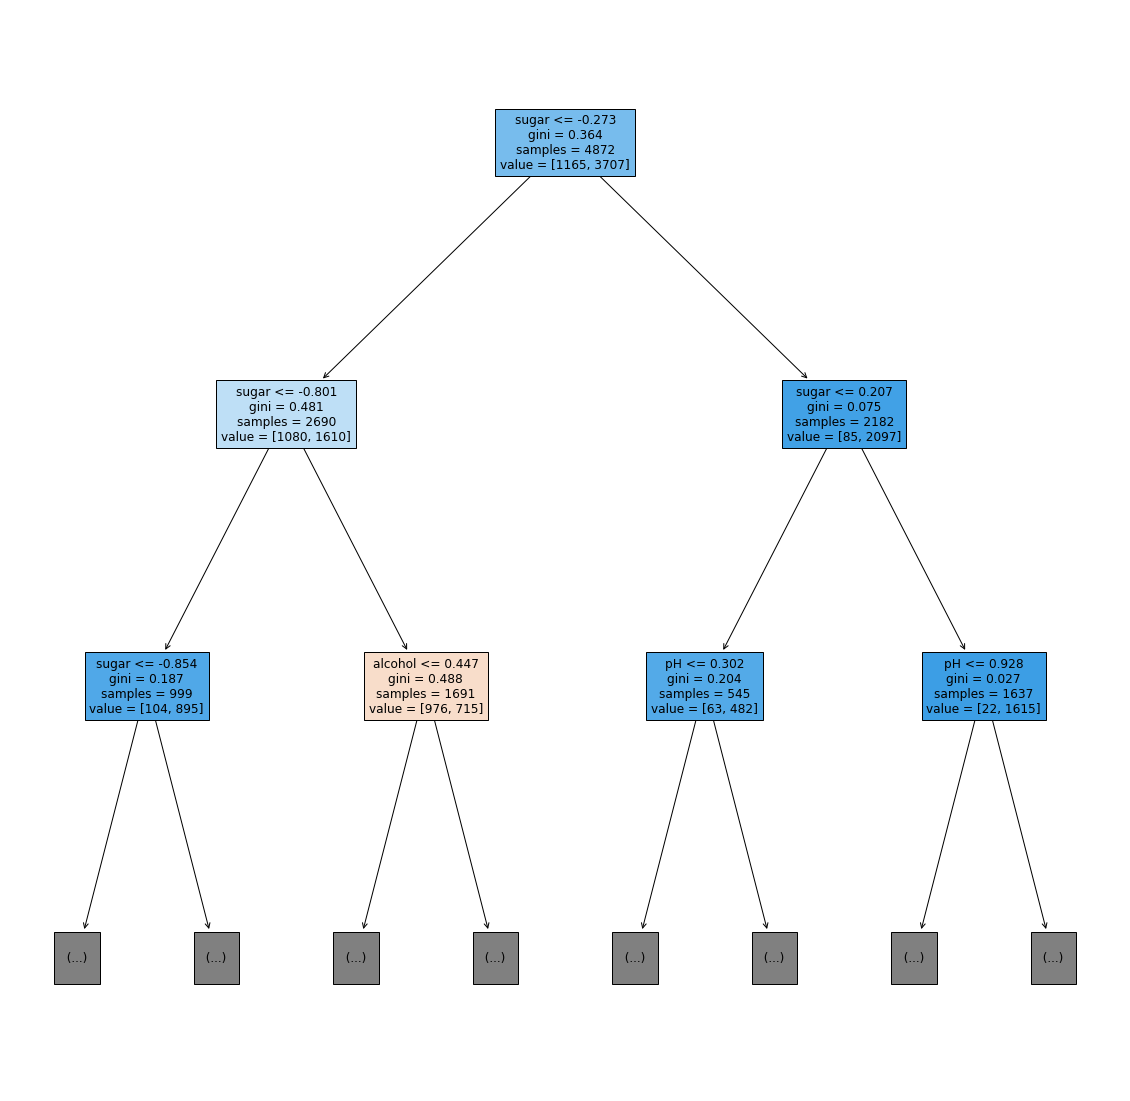

In [109]:
plt.figure(figsize=(20,20))
plot_tree(dt,
          max_depth=2, # 트리의 깊이(첫번째 제외)
          filled=True, # 독립변수별로 색으로 구분
          feature_names=['alcohol','sugar','pH']) # 사용된 독립변수 이름
plt.show()

# gini : 불순도
# samples : 훈련에 사용된 총 데이터수
# value : 범주별로 사용된(구분된) 데이터수

# 가장 첫번째 트리 : 루트노드(root node)
# 가장 아래 트리 : 리프노드(leaf node)

#### 가지치기
- max_depth : 트리의 개수 제한
- 트리가 너무 뻗어나가도 정확도가 떨어짐
- 제한 없이 뻗어나가는 것을 max_depth로 제어

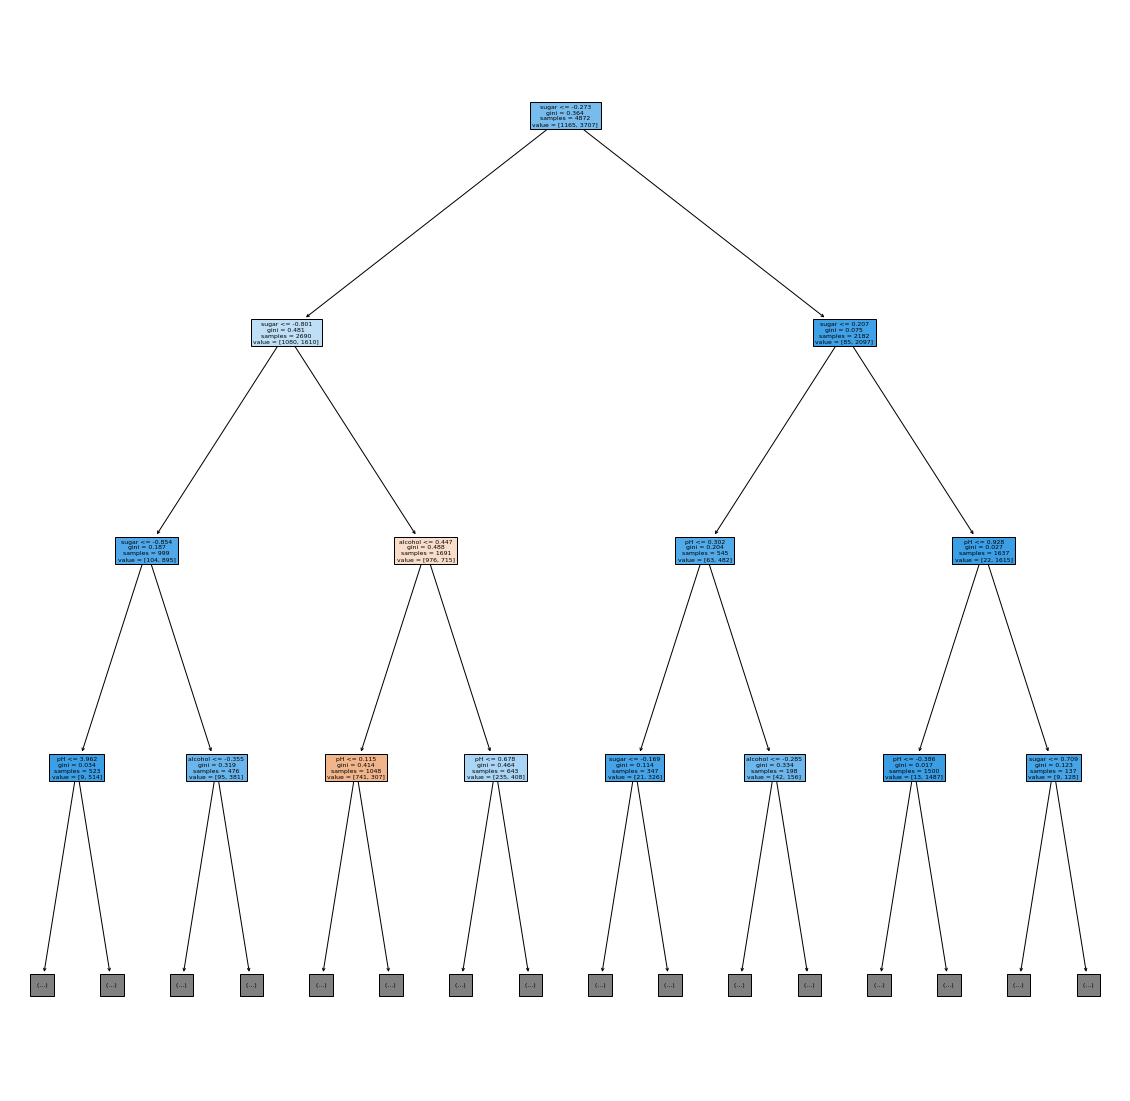

In [110]:
plt.figure(figsize=(20,20))
plot_tree(dt,
          max_depth=3, # 트리의 깊이(첫번째 제외)
          filled=True, # 독립변수별로 색으로 구분
          feature_names=['alcohol','sugar','pH']) # 사용된 독립변수 이름
plt.show()

#### 특성중요도
- 트리 훈련에 사용된 독립변수(특성=퓨처)들의 정확도 확인
- 정확도가 가장 높은 독립변수가 훈련에 영향을 가장 많이 미쳤다고 판단

In [111]:
print(dt.feature_importances_)

[0.2375681  0.51558724 0.24684466]


In [112]:
wine_input = wine[['alcohol','sugar']]
# wine_input = wine[['alcohol']]
wine_input = wine_input.to_numpy()
print(wine_input.shape)

wine_target = wine['class']
wine_target = np.array(wine_target)
print(wine_target.shape)

train_input, test_input, train_target, test_target = train_test_split(wine_input,
                                                                      wine_target,
                                                                      test_size=0.25,
                                                                      random_state=42)

print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input, train_target)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(ss.mean_, ss.scale_)

(6497, 2)
(6497,)
(4872, 2)
(4872,)
(1625, 2)
(1625,)
[10.49046798  5.45803571] [1.19475276 4.78329406]


0.8499589490968801
0.8363076923076923


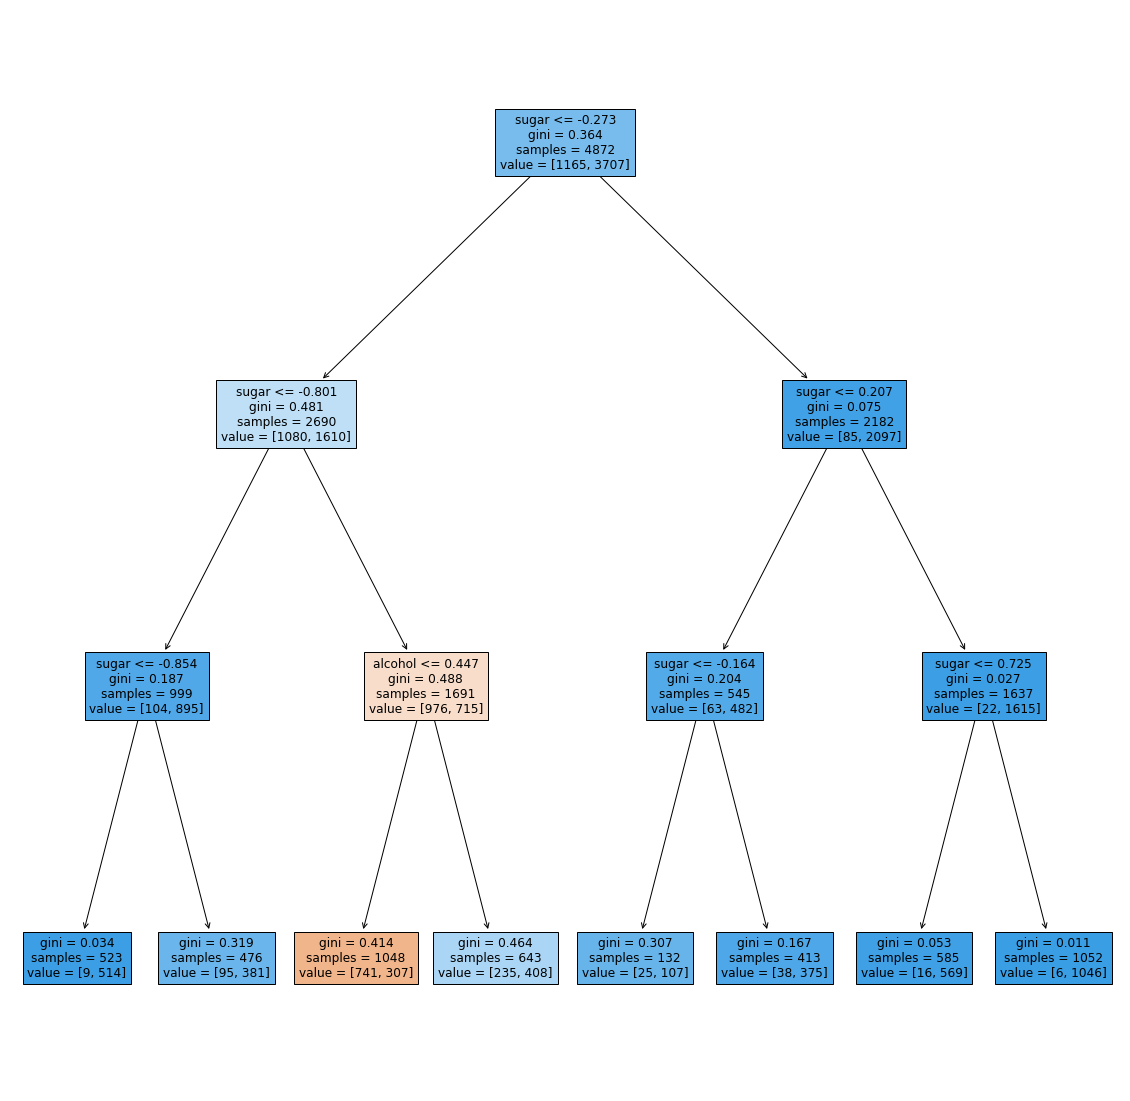

In [113]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

plt.figure(figsize=(20,20))
plot_tree(dt,
          max_depth=3, # 트리의 깊이(첫번째 제외)
          filled=True, # 독립변수별로 색으로 구분
          feature_names=['alcohol','sugar']) # 사용된 독립변수 이름
plt.show()

#### [ㅇㅇ]

In [114]:
### <출력결과>
# class_pred가 추가된 데이터프레임 출력
# (출력결과) 데이터프레임의 5개 칼럼 모두 출력
# alcohol, sugar, pH, class, class_pred

# 정답을 맞춘 갯수와 틀린 갯수 출력하기
# (출력예시) 총개수[6497]건 중에, 정답개수[]건, 오답개수[]건

# 정답률과 오답률 출력하기
# (출력예시) 총 100.0% 중 정답률 []%, 오답률 []%

#### 독립변수 : 특성을 자유롭게 조합해 가면서 검증해보기
- 특성 자유롭게 조합, 적용 하면서 정확도 차이 확인
- 전체 특성도 모두 적용해보기
- 사용한 모델별로, 예측을 통한 결과를 데이터프레임에 col_predict 컬럼명으로 추가

In [121]:
# [문제] 와인 데이터 사용
# 와인의 화학 조성을 사용하여 와인의 종류 예측(자유롭게)

# 특성 이름을 담고 있는 key 값 = feature_names
# 특성 데이터를 담고 있는 key 값 = data
# 범주 와인의 종류를 담고 있는 key 값 = target_names
# - 범주는 'class_0'과 'class_1'만 사용(0과 1로 변경하여 사용)
# - 0 = 레드와인, 1 = 화이트와인

# 알콜(alcohol)
# 말산(Malic acid)
# 회분(Ash)
# 회분의 알칼리도(Alcalinity of ash)
# 마그네슘(Magnesium)
# 총 폴리페놀(Total phenols)
# 플라보노이드 폴리페놀(Flavanoids)
# 비 플라보노이드 폴리페놀(Nonflavanoid phenols)
# 프로안토시아닌(Proanthocyanins)
# 색상의 강도(Color intens)
# 색상(Color)
# 희석 와인의 00280/00315 비율 (00280/00315 of diluted wines)
# 프롤린(Proline)

##### 전처리

In [181]:
from sklearn.datasets import load_wine

wine_all = load_wine()
print(wine_all.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [296]:
wine_data = wine_all['data']
wine_target = wine_all['target']
wine_target_names = wine_all['target_names']
wine_feature_names = wine_all['feature_names']

In [378]:
import pandas as pd

wine_data_df = pd.DataFrame(wine_data)
wine_target_df = pd.DataFrame(wine_target)
wine_target_names = list(wine_target_names)
wine_feature_names =list(wine_feature_names)

In [298]:
wine_data_df.columns = [wine_feature_names]
wine_data = wine_data_df.to_numpy()
wine_data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [299]:
wine_target_df.iloc[:59] = 'class_0'
wine_target_df.iloc[59:130] ='class_1'
wine_target_df.iloc[130:] ='class_2'
print(wine_target_df.value_counts())

class_1    71
class_0    59
class_2    48
dtype: int64


In [300]:
wine_target = wine_target_df.to_numpy()
wine_target

array([['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],
       ['class_0'],


In [301]:
train_input, test_input, train_target, test_target = train_test_split(wine_data,
                                                                      wine_target,
                                                                      random_state=42)

In [302]:
ss = StandardScaler()

ss.fit(train_input, train_target)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(ss.mean_, ss.scale_)

[1.29728571e+01 2.38684211e+00 2.36218045e+00 1.94338346e+01
 1.00759398e+02 2.27706767e+00 2.02120301e+00 3.63533835e-01
 1.60864662e+00 5.01759398e+00 9.59443609e-01 2.61000000e+00
 7.42992481e+02] [8.26867057e-01 1.09476565e+00 2.79549418e-01 3.45425285e+00
 1.49430751e+01 6.43264445e-01 1.00174963e+00 1.26444707e-01
 5.74790949e-01 2.19422007e+00 2.33661197e-01 7.27211173e-01
 3.05711779e+02]


##### 의사결정나무

In [278]:
dt = DecisionTreeClassifier()

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

1.0
0.9333333333333333


In [279]:
wine_feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

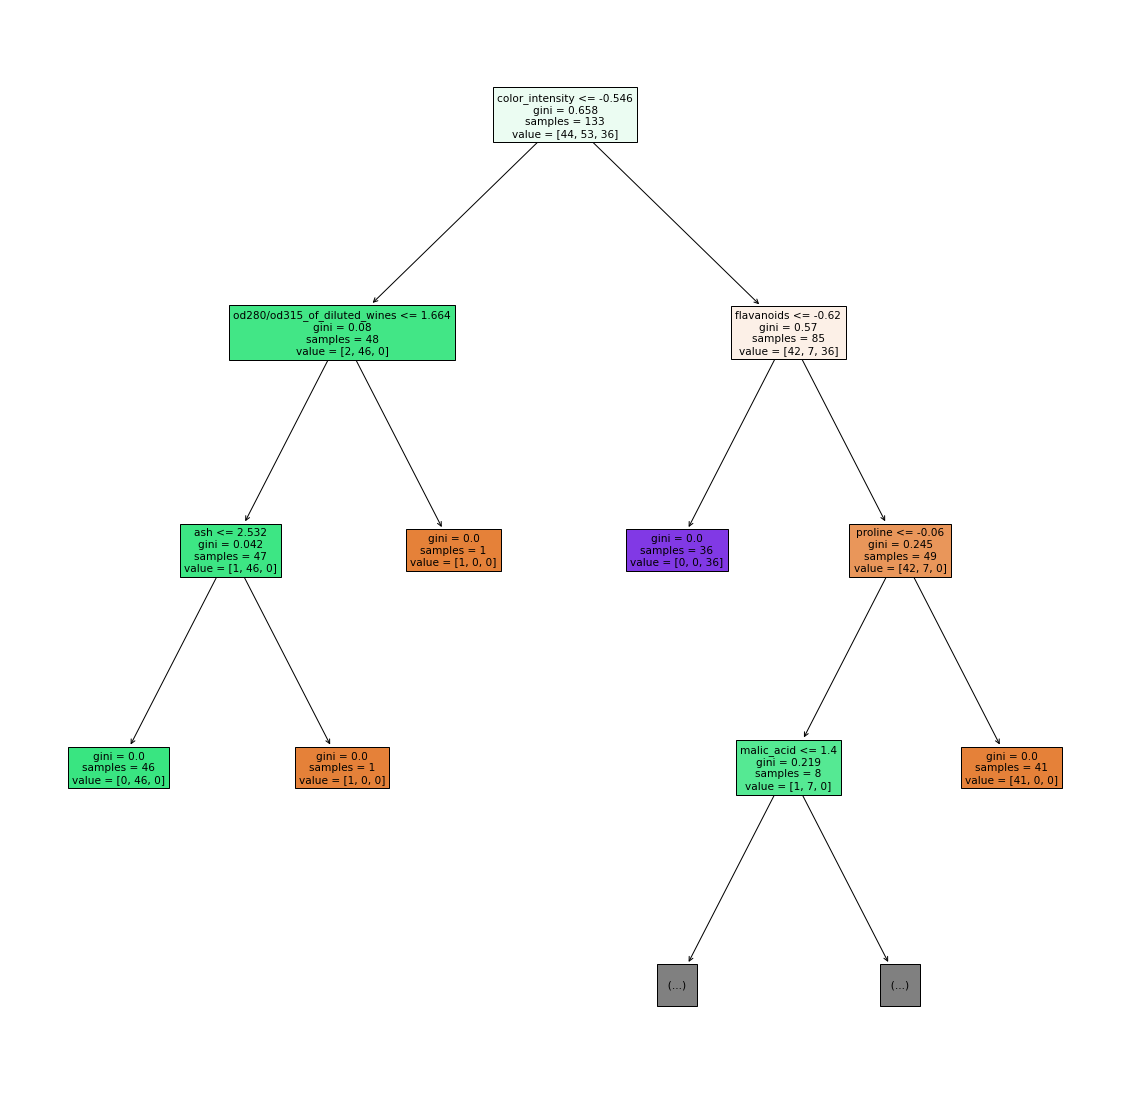

In [280]:
plt.figure(figsize=(20,20))
plot_tree(dt,
          max_depth=3, # 트리의 깊이(첫번째 제외)
          filled=True, # 독립변수별로 색으로 구분
          feature_names=['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline']) # 사용된 독립변수 이름
plt.show()

In [328]:
print(dt.feature_importances_)
print(wine_feature_names)

[0.01998197 0.02141938 0.41589367 0.40331707 0.13938791]
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [283]:
predict_data = wine_data_df[['alcohol','ash','flavanoids','color_intensity','proline']]
predict_data

,alcohol,ash,flavanoids,color_intensity,proline
0,14.23,2.43,3.06,5.64,1065.0
1,13.20,2.14,2.76,4.38,1050.0
2,13.16,2.67,3.24,5.68,1185.0
3,14.37,2.50,3.49,7.80,1480.0
4,13.24,2.87,2.69,4.32,735.0
...,...,...,...,...,...
173,13.71,2.45,0.61,7.70,740.0
174,13.40,2.48,0.75,7.30,750.0
175,13.27,2.26,0.69,10.20,835.0
176,13.17,2.37,0.68,9.30,840.0


In [284]:
print(len(predict_data))
print(len(train_target))

178
133


In [384]:
train_input, test_input, train_target, test_target = train_test_split(predict_data,
                                                                      wine_target,
                                                                      random_state=42)

In [385]:
ss = StandardScaler()

ss.fit(train_input, train_target)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(ss.mean_, ss.scale_)

ValueError: could not convert string to float: 'class_0'

In [287]:
dt = DecisionTreeClassifier()

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))



1.0
0.9555555555555556


In [288]:
dt.predict(predict_data)

array(['class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 

##### 확률적 경사하강법

In [337]:
train_input, test_input, train_target, test_target = train_test_split(wine_data,
                                                                      wine_target,
                                                                      random_state=42)

In [338]:
ss = StandardScaler()

ss.fit(train_input, train_target)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(ss.mean_, ss.scale_)

[1.29728571e+01 2.38684211e+00 2.36218045e+00 1.94338346e+01
 1.00759398e+02 2.27706767e+00 2.02120301e+00 3.63533835e-01
 1.60864662e+00 5.01759398e+00 9.59443609e-01 2.61000000e+00
 7.42992481e+02] [8.26867057e-01 1.09476565e+00 2.79549418e-01 3.45425285e+00
 1.49430751e+01 6.43264445e-01 1.00174963e+00 1.26444707e-01
 5.74790949e-01 2.19422007e+00 2.33661197e-01 7.27211173e-01
 3.05711779e+02]


In [339]:
from sklearn.linear_model import SGDClassifier

# 클래스(모델)생성
sc = SGDClassifier(loss="log", max_iter=10, random_state=42)

### 훈련모델 생성하기
sc.fit(train_scaled, train_target)

### 훈련모델 분류 정확도 확인하기
# - 과적합 여부 확인을 위해 훈련 및 테스트 데이터 모두확인
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

1.0
0.9777777777777777


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [340]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

1.0
0.9777777777777777


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [341]:
import numpy as np

sc = SGDClassifier(loss="log", random_state=42)

train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여 정확도를 리스트에 저장
for _ in range(0, 300) :
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [342]:
print("훈련 정확도 리스트 갯수 = ", len(train_score))
print("테스트 정확도 리스트 갯수 = ", len(test_score))

훈련 정확도 리스트 갯수 =  300
테스트 정확도 리스트 갯수 =  300


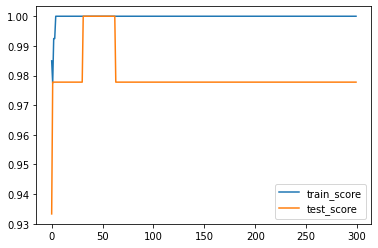

In [343]:
import matplotlib.pyplot as plt

plt.plot(train_score, label="train_score")
plt.plot(test_score, label="test_score")
plt.legend()
plt.show()

In [373]:
sc = SGDClassifier(loss="log", max_iter=40, tol=None, random_state=42)

### 훈련모델 생성하기
sc.fit(train_scaled, train_target)

### 훈련모델 분류 정확도 확인하기
# - 과적합 여부 확인을 위해 훈련 및 테스트 데이터 모두확인
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

1.0
1.0


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [374]:
### 독립변수 특성 데이터만 추출
predict_data = wine_data_df[['alcohol','ash','flavanoids','color_intensity','proline']]
predict_data

,alcohol,ash,flavanoids,color_intensity,proline
0,14.23,2.43,3.06,5.64,1065.0
1,13.20,2.14,2.76,4.38,1050.0
2,13.16,2.67,3.24,5.68,1185.0
3,14.37,2.50,3.49,7.80,1480.0
4,13.24,2.87,2.69,4.32,735.0
...,...,...,...,...,...
173,13.71,2.45,0.61,7.70,740.0
174,13.40,2.48,0.75,7.30,750.0
175,13.27,2.26,0.69,10.20,835.0
176,13.17,2.37,0.68,9.30,840.0


In [375]:
predict_data = wine_data_df.to_numpy()
predict_data

array([[14.23, 1.71, 2.43, ..., 1065.0, nan, 'class_0'],
       [13.2, 1.78, 2.14, ..., 1050.0, nan, 'class_0'],
       [13.16, 2.36, 2.67, ..., 1185.0, nan, 'class_0'],
       ...,
       [13.27, 4.28, 2.26, ..., 835.0, nan, 'class_2'],
       [13.17, 2.59, 2.37, ..., 840.0, nan, 'class_2'],
       [14.13, 4.1, 2.74, ..., 560.0, nan, 'class_2']], dtype=object)

In [376]:
predict_scaled = ss.transform(predict_data)
predict_scaled

ValueError: could not convert string to float: 'class_0'

In [379]:
result_predict = sc.predict(predict_scaled)
print(result_predict)
wine_pred = wine_data_df
wine_pred["class"] = wine_target_df
wine_pred["class_pred"] = result_predict
wine_pred

['class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0'
 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0'
 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0'
 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0'
 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0'
 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0'
 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0'
 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0' 'class_0'
 'class_0' 'class_0' 'class_0' 'class_1' 'class_1' 'class_1' 'class_1'
 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1'
 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1'
 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1'
 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1'
 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1' 'class_1'
 'clas

,0,1,2,3,4,5,6,7,8,9,10,11,12,class,class_pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2,class_2


In [380]:
o_cnt = len(wine_pred[(wine_pred["class"] == wine_pred["class_pred"])])
o_cnt

x_cnt = len(wine_pred[(wine_pred["class"] != wine_pred["class_pred"])])
x_cnt

sum_cnt = len(wine_pred)
sum_cnt 

print("총 갯수[{}]건 중에, 정답갯수[{}]건, 오답 갯수[{}]건".format(sum_cnt, o_cnt, x_cnt))

총 갯수[178]건 중에, 정답갯수[178]건, 오답 갯수[0]건


In [381]:
### 정답률과 오답률 확인하기
import numpy as np

o_p = np.round(o_cnt / sum_cnt * 100, 2)
x_p = np.round(x_cnt / sum_cnt * 100, 2)
sum_p = o_p + x_p

print("총 {}% 중 정답률[{}%], 오답률[{}%]".format(sum_p, o_p, x_p))

총 100.0% 중 정답률[100.0%], 오답률[0.0%]
